# spec ai recognition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
import pandas as pd
from scipy.interpolate import interp1d
from numpy.random import rand
import os

## Training with simulations

fit with [Pi](https://www.uni-due.de/~hm236ap/hoersten/home.html)

0 = Mössbauer

1 = EXAFS

In [2]:
X,y = [],[]

In [3]:
#
#function for shaping input data
# return list of with length=size

def shaping(xarr,yarr,size,noise=0):
    xarr = np.array(xarr)
    yarr = np.array(yarr)
    xnew = np.linspace(np.min(xarr),np.max(xarr),size)
    f = interp1d(xarr,yarr)
    return list(np.asarray(f(xnew)+rand(size)*noise))   

### Mössbauer shaping

In [4]:
#
for p in range(500):
    t = pd.read_csv('data_simulated/ms/test_MS.dat',
                    delim_whitespace=True,
                    header=None,skiprows=1)
    X.append(shaping(t[0],t[3],256,noise=.25))
    y.append('MS') # attach label

### EXAFS spectra shaping
Data from FEFF, all xmu.dat I found on my machine

In [5]:
exafsfiles= 'data_simulated/exafs/'
for file in os.listdir(exafsfiles):
    try: 
        s = pd.read_csv(exafsfiles+file,delim_whitespace=True,header=None,comment='#')
        X.append(shaping(s[0],s[3],256,noise=.005))
        y.append('EXAFS')
    except:
        print(file)

### Training the classifier

In [6]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
clf = svm.SVC(gamma=0.001)

In [7]:
data = np.array(X)
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, np.array(y), test_size=0.5, shuffle=True)

In [8]:
#Training the KI:
clf.fit(X_train, y_train)

SVC(gamma=0.001)

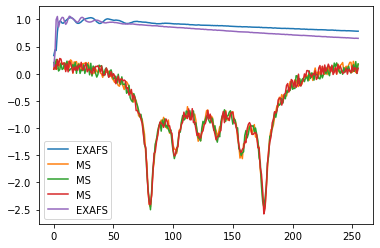

In [9]:
#test if everything is correct:
for n in range(5,10):
    plt.plot(X_train[n],label=y_train[n])
plt.legend()

Confusion matrix:
[[280   0]
 [  0 254]]


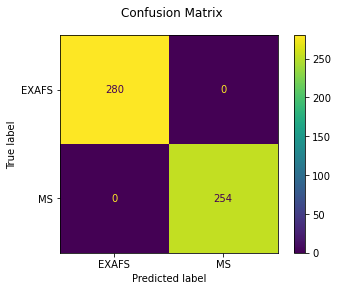

In [10]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()




## Use real life data
different measurements, elements

### EXAFS

array(['EXAFS'], dtype='<U5')

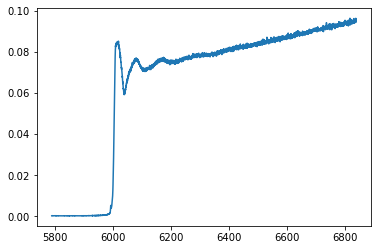

In [11]:
f = pd.read_csv('data_measured/exafs/measured_EXAFS.dat', 
                header=None,skiprows=1,delim_whitespace=True)
plt.plot(f[0],f[7])
f = shaping(f[0],f[7],256)


clf.predict([f])

### Mössbauer

array(['MS'], dtype='<U5')

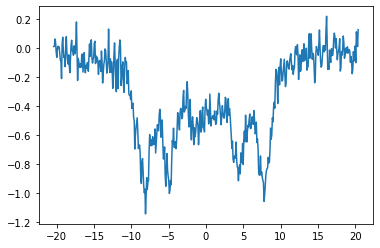

In [12]:
f = pd.read_csv('data_measured/ms/measured_MS.dat',
                delim_whitespace=True,header=None,skiprows=1)

plt.plot(f[0],f[1])
f = shaping(t[0],t[1],256)

clf.predict([f])